<a href="https://colab.research.google.com/github/MarynaTatsevich/AI/blob/master/Project_1_A_single_neuron_model_for_converting_C_to_F.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Problem statement
In this project, we will build a simple machine learning model to convert from celsius to fahrenheit.

## Step 0: Import libraries

In [3]:
!pip install tensorflow-gpu==2.0.0.alpha0

     |████████████████████████████████| 332.1MB 48kB/s 
     |████████████████████████████████| 419kB 52.7MB/s 
     |████████████████████████████████| 3.0MB 56.6MB/s 


In [0]:
import tensorflow as tf
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

## Step 1: Import dataset

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
df = pd.read_csv('/content/drive/My Drive/Colab Notebooks/Celsius-To-Fahrenheit.csv')

In [6]:
df.head()

,Celsius,Fahrenheit
0,-50,-58.0
1,-40,-40.0
2,-30,-22.0
3,-20,-4.0
4,-10,14.0


In [7]:
df.tail(10)

,Celsius,Fahrenheit
20,6,42.8
21,7,44.6
22,8,46.4
23,9,48.2
24,10,50.0
25,20,68.0
26,30,86.0
27,40,104.0
28,50,122.0
29,60,140.0


In [8]:
df.describe()

,Celsius,Fahrenheit
count,30.000000,30.000000
mean,2.000000,35.600000
std,22.780815,41.005466
min,-50.000000,-58.000000
25%,-6.750000,19.850000
50%,0.500000,32.900000
75%,7.750000,45.950000
max,60.000000,140.000000


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 2 columns):
Celsius       30 non-null int64
Fahrenheit    30 non-null float64
dtypes: float64(1), int64(1)
memory usage: 608.0 bytes


## Step 2: Visualize dataset

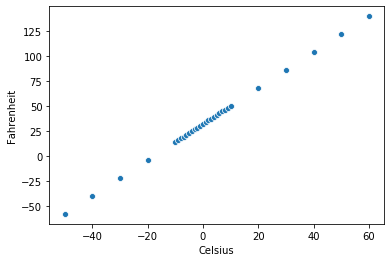

In [10]:
sns.scatterplot(df['Celsius'], df['Fahrenheit'])

## Step 3: Create testing and training dataset

In [0]:
X_train = df['Celsius']
y_train = df['Fahrenheit']

## Step 4: Build and train the model

In [12]:
X_train.shape

(30,)

In [13]:
y_train.shape

(30,)

In [0]:
model = tf.keras.Sequential()
model.add(tf.keras.layers.Dense(units=1, input_shape=[1]))

In [23]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_2 (Dense)              (None, 1)                 2         
Total params: 2
Trainable params: 2
Non-trainable params: 0
_________________________________________________________________


In [0]:
model.compile(optimizer=tf.keras.optimizers.Adam(0.5), loss = 'mean_squared_error')

In [27]:
epochs_hist = model.fit(X_train, y_train, epochs = 100)

Epoch 1/100
30/30 [==============================] - 0s 2ms/sample - loss: 6.9202
Epoch 2/100
30/30 [==============================] - 0s 113us/sample - loss: 129.9267
Epoch 3/100
30/30 [==============================] - 0s 145us/sample - loss: 10.4339
Epoch 4/100
30/30 [==============================] - 0s 158us/sample - loss: 29.0744
Epoch 5/100
30/30 [==============================] - 0s 121us/sample - loss: 73.7742
Epoch 6/100
30/30 [==============================] - 0s 160us/sample - loss: 55.4191
Epoch 7/100
30/30 [==============================] - 0s 114us/sample - loss: 15.9877
Epoch 8/100
30/30 [==============================] - 0s 118us/sample - loss: 0.0868
Epoch 9/100
30/30 [==============================] - 0s 171us/sample - loss: 15.2366
Epoch 10/100
30/30 [==============================] - 0s 133us/sample - loss: 34.6041
Epoch 11/100
30/30 [==============================] - 0s 146us/sample - loss: 34.4982
Epoch 12/100
30/30 [==============================] - 0s 110us/sam

## Step 5: Evaluate the model

In [29]:
epochs_hist.history.keys()

dict_keys(['loss'])

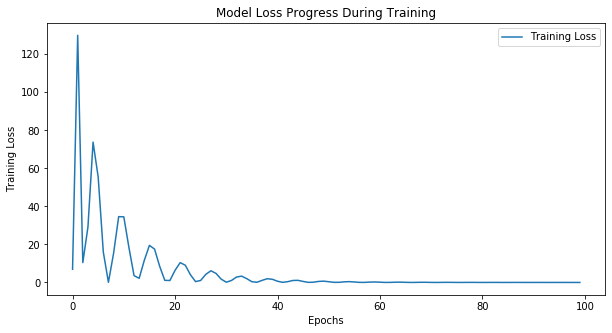

In [34]:
plt.figure(figsize=(10,5))
plt.plot(epochs_hist.history['loss'])
plt.title('Model Loss Progress During Training')
plt.xlabel('Epochs')
plt.ylabel('Training Loss')
plt.legend(['Training Loss'])

In [35]:
model.get_weights()

[array([[1.797354]], dtype=float32), array([31.990849], dtype=float32)]

In [37]:
Temp_C = 0
Temp_F = model.predict([Temp_C])
print('Temperature in DegF using Trained ANN =', Temp_F)

Temperature in DegF using Trained ANN = [[31.990849]]


In [39]:
# Let's confirm with the equation
Temp_C = 0
Temp_F_m = model.predict([Temp_C])
Temp_F_e = Temp_C*9/5 + 32
print('Temperature in DegF using Trained ANN =', Temp_F_m)
print('Temperature in DegF using the equation =', Temp_F_e)

Temperature in DegF using Trained ANN = [[31.990849]]
Temperature in DegF using the equation = 32.0


In [40]:
Temp_C = 100
Temp_F_m = model.predict([Temp_C])
Temp_F_e = Temp_C*9/5 + 32
print('Temperature in DegF using Trained ANN =', Temp_F_m)
print('Temperature in DegF using the equation =', Temp_F_e)

Temperature in DegF using Trained ANN = [[211.72624]]
Temperature in DegF using the equation = 212.0
